In [14]:
import json
import pandas as pd
import requests
from datetime import date, datetime, timedelta
import matplotlib.pyplot as plt



In [15]:
# Ask for Ticker symbol
stock = input("Enter the Ticker Symbol of the Stock: ")
print("The Stock we will research is: " + stock)

Enter the Ticker Symbol of the Stock:  GOOG


The Stock we will research is: GOOG


In [16]:
end_date = datetime.today()
start_date = end_date - timedelta(days=30)
    
  
apikey = "BKEANwmdWW8EoIBFoJi6d83S2UMVZf8z9FMygIzW"
quote_url = "https://yfapi.net/v6/finance/quote"
summary_url = f"https://yfapi.net/v11/finance/quoteSummary/{stock}"
historical_url = f"https://yfapi.net/v8/finance/chart/{stock}"

quote_querystring = {"symbols": stock}
summary_querystring = {'modules': 'financialData'}
historical_querystring = {
        "symbol": stock,
        "period1": int(start_date.timestamp()),
        "period2": int(end_date.timestamp()),
        "interval": "1d" 
}
# Define headers
headers = {'x-api-key': apikey}

In [17]:
# Get stock information
quote_response = requests.request("GET", quote_url, headers=headers, params=quote_querystring)


quote_data = quote_response.json()


if not quote_data.get('quoteResponse', {}).get('result'):
    print(f"Either no data is found for Ticker symbol, {stock} and you should try another Ticker symbol or if the symbol is correct there is an issue with the API conection.")
    exit()

if quote_data.get('quoteResponse', {}).get('result'): 
    full_name = quote_data['quoteResponse']['result'][0].get("longName", "N/A")
    current_price = quote_data['quoteResponse']['result'][0].get("regularMarketPrice", "N/A")


    summary_response = requests.request("GET", summary_url, headers=headers, params=summary_querystring)


    summary_data = summary_response.json()
    target_mean_price = summary_data['quoteSummary']['result'][0]['financialData'].get("targetMeanPrice", {}).get("raw", "N/A")
    cash_on_hand = summary_data['quoteSummary']['result'][0]['financialData'].get("totalCash", {}).get("raw", "N/A")
    gross_profits = summary_data['quoteSummary']['result'][0]['financialData'].get("grossProfits", {}).get("raw", "N/A") 

In [18]:
#Print Infromation
print(f"Ticker: {stock}")
print(f"Full Name of the Stock: {full_name}")
print(f"Current Price: ${current_price}")
print(f"Target Mean Price: ${target_mean_price}")
print(f"Cash on Hand: ${cash_on_hand}")
print(f"Gross Profits: ${gross_profits}")

Ticker: GOOG
Full Name of the Stock: Alphabet Inc.
Current Price: $131.85
Target Mean Price: $142.3
Cash on Hand: $118331998208
Gross Profits: $156633000000


In [19]:
#Write to json file
stock_info = {
    "Ticker": stock,
    "Full Name of the Stock": full_name,
    "Current Price": current_price,
    "Target Mean Price": target_mean_price,
    "Cash on Hand": cash_on_hand,
    "Gross Profits": gross_profits
}

with open('dat.json', 'w') as f:
    json.dump(stock_info, f, indent=2)

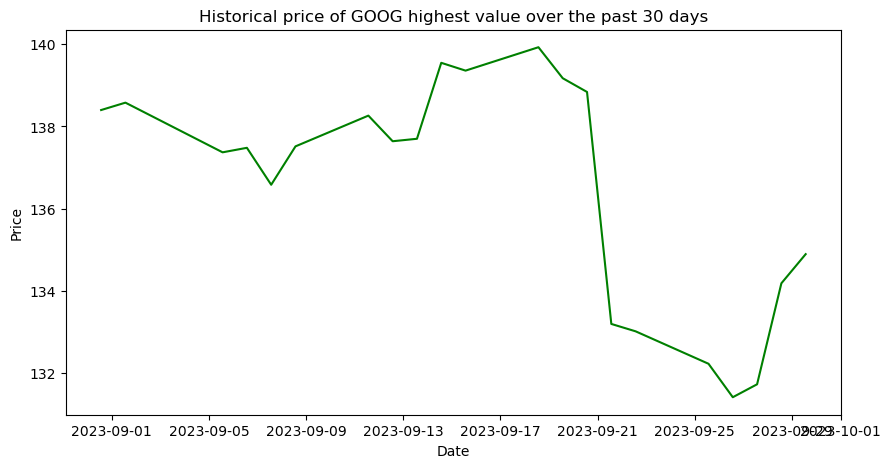

In [22]:
#Extra credit 
historical_response = requests.request("GET", historical_url, headers=headers, params=historical_querystring)
historical_data = historical_response.json()


if 'chart' in historical_data and 'result' in historical_data['chart'] and historical_data['chart']['result']:
    historical_prices = historical_data['chart']['result'][0]['indicators']['quote'][0]['high']

   
    # Plot 
    plt.figure(figsize=(10, 5))
    plt.plot(historical_dates, historical_prices, label=f"Highest Price - {stock}", color='green')
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.title(f"Historical price of {stock} highest value over the past 30 days")
    

  
    plt.show()
else:
    print(f"No historical data available for {stock}.")
    